In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [3]:
# TF Keras API
# Overfitting: Accuracy of model on validation data peaks after
# training for a number of epochs, then starts decreasing. 
# Indicates that the model has achieved high accuracy on the 
# training set, but does not generalize well to a test set.
# Best solution: use more training data.
# Second best solution: Regularization - places constraints on 
# quantity and type of info the model can store. Forces the 
# model to focus on the most prominent patterns.

In [4]:
# Explore two common regularization techniques: weight 
# regularization and dropout.
# Use them to improve IMDB movie review classification notebook.
from __future__ import absolute_import, division,\
    print_function, unicode_literals

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)

1.14.0


In [13]:
# Download IMDB dataset
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = \
keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [14]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape
    # ( len(sequences), dimension )
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        # Set specific indices of results[i] to 1's
        results[i, word_indices] = 1.0
    return results

In [15]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)

In [16]:
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

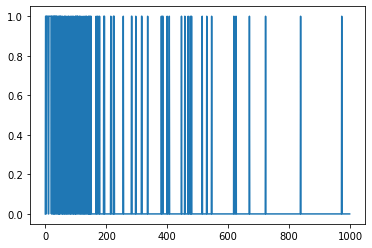

In [17]:
plt.plot(train_data[0])

In [18]:
# Demonstrate overfitting
# Simplest way to prevent overfitting: reduce the size of the
# model; reduce model's capacity.
# Best practice: Start with relatively few layers and params.
# Begin increasing the size of the layers/adding new layers until
# you see diminishing returns on the validation loss.

In [19]:
# Create a baseline model
baseline_model = keras.Sequential([
    # input_shape required so that .summary works
    keras.layers.Dense(16, activation=tf.nn.relu, \
                       input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
# Compile model
baseline_model.compile(optimizer='adam', \
                       loss='binary_crossentropy', \
                      metrics=['accuracy', \
                               'binary_crossentropy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Fit the model.
baseline_history = baseline_model.fit(train_data, train_labels,\
                        epochs=20, batch_size=512, \
                        validation_data=(test_data, test_labels),\
                        verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.5605 - acc: 0.7127 - binary_crossentropy: 0.5605 - val_loss: 0.4211 - val_acc: 0.8190 - val_binary_crossentropy: 0.4211
Epoch 2/20
25000/25000 - 2s - loss: 0.3661 - acc: 0.8458 - binary_crossentropy: 0.3661 - val_loss: 0.3592 - val_acc: 0.8464 - val_binary_crossentropy: 0.3592
Epoch 3/20
25000/25000 - 2s - loss: 0.3233 - acc: 0.8663 - binary_crossentropy: 0.3233 - val_loss: 0.3320 - val_acc: 0.8592 - val_binary_crossentropy: 0.3320
Epoch 4/20
25000/25000 - 2s - loss: 0.3095 - acc: 0.8724 - binary_crossentropy: 0.3095 - val_loss: 0.3289 - val_acc: 0.8603 - val_binary_crossentropy: 0.3289
Epoch 5/20
25000/25000 - 2s - loss: 0.2999 - acc: 0.8762 - binary_crossentropy: 0.2999 - val_loss: 0.3280 - val_acc: 0.8604 - val_binary_crossentropy: 0.3280
Epoch 6/20
25000/25000 - 2s - loss: 0.2948 - acc: 0.8774 - binary_crossentropy: 0.2948 - val_loss: 0.3291 - val_acc: 0.8589 - val_binary_crossentropy: 0.3291
Ep

In [23]:
# Create a smaller model
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, \
                      input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [24]:
# Compile smaller model
smaller_model.compile(optimizer='adam',\
                     loss='binary_crossentropy',\
                     metrics=['accuracy', 'binary_crossentropy'])

In [25]:
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Train the model using the same data.
smaller_history = smaller_model.fit(train_data, train_labels,\
                        epochs=20, batch_size=512,\
                        validation_data=(test_data,test_labels),\
                        verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6182 - acc: 0.6800 - binary_crossentropy: 0.6182 - val_loss: 0.5195 - val_acc: 0.7911 - val_binary_crossentropy: 0.5195
Epoch 2/20
25000/25000 - 2s - loss: 0.4434 - acc: 0.8216 - binary_crossentropy: 0.4434 - val_loss: 0.3956 - val_acc: 0.8405 - val_binary_crossentropy: 0.3956
Epoch 3/20
25000/25000 - 2s - loss: 0.3627 - acc: 0.8549 - binary_crossentropy: 0.3627 - val_loss: 0.3556 - val_acc: 0.8545 - val_binary_crossentropy: 0.3556
Epoch 4/20
25000/25000 - 2s - loss: 0.3321 - acc: 0.8662 - binary_crossentropy: 0.3321 - val_loss: 0.3391 - val_acc: 0.8583 - val_binary_crossentropy: 0.3391
Epoch 5/20
25000/25000 - 2s - loss: 0.3178 - acc: 0.8702 - binary_crossentropy: 0.3178 - val_loss: 0.3344 - val_acc: 0.8598 - val_binary_crossentropy: 0.3344
Epoch 6/20
25000/25000 - 2s - loss: 0.3104 - acc: 0.8729 - binary_crossentropy: 0.3104 - val_loss: 0.3307 - val_acc: 0.8606 - val_binary_crossentropy: 0.3307
Ep

In [28]:
# Create a bigger model
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu,\
                      input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [30]:
# Compile model
bigger_model.compile(optimizer='adam', \
                    loss='binary_crossentropy',\
                    metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Train the model with the same data.
bigger_history = bigger_model.fit(train_data, train_labels,\
                    epochs=20, batch_size=512, \
                    validation_data=(test_data, test_labels),\
                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 12s - loss: 0.4041 - acc: 0.8167 - binary_crossentropy: 0.4041 - val_loss: 0.3307 - val_acc: 0.8581 - val_binary_crossentropy: 0.3307
Epoch 2/20
25000/25000 - 10s - loss: 0.2885 - acc: 0.8802 - binary_crossentropy: 0.2885 - val_loss: 0.3256 - val_acc: 0.8600 - val_binary_crossentropy: 0.3256
Epoch 3/20
25000/25000 - 15s - loss: 0.2255 - acc: 0.9102 - binary_crossentropy: 0.2255 - val_loss: 0.3508 - val_acc: 0.8538 - val_binary_crossentropy: 0.3508
Epoch 4/20
25000/25000 - 13s - loss: 0.1146 - acc: 0.9637 - binary_crossentropy: 0.1146 - val_loss: 0.4087 - val_acc: 0.8504 - val_binary_crossentropy: 0.4087
Epoch 5/20
25000/25000 - 8s - loss: 0.0286 - acc: 0.9947 - binary_crossentropy: 0.0286 - val_loss: 0.5072 - val_acc: 0.8463 - val_binary_crossentropy: 0.5072
Epoch 6/20
25000/25000 - 10s - loss: 0.0058 - acc: 0.9997 - binary_crossentropy: 0.0058 - val_loss: 0.6040 - val_acc: 0.8507 - val_binary_crossentropy: 0.60

In [32]:
# Plot training and validation loss
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, \
                       history.history['val_'+key],\
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key],\
                color=val[0].get_color(), \
                label=name.title() + ' Train')
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        plt.xlim([0, max(history.epoch)])
        

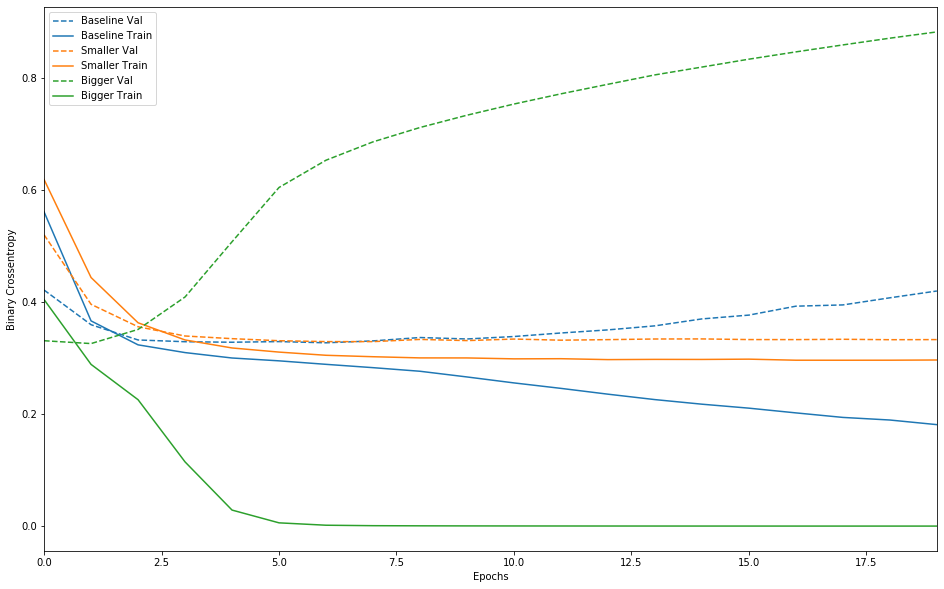

In [34]:
plot_history([('baseline', baseline_history),\
             ('smaller', smaller_history),\
             ('bigger', bigger_history)])

In [35]:
# Notice: Larger network begins overfitting almost right away,
# after just one epoch, and overfits much more severely than
# the other networks.

In [36]:
# Strategies:
# 1. Add weight regularization.
# "Simpler models", i.e. those in which the distribution of
# parameter values has less entropy - often corresponding to 
# models with fewer parameters.
# Weight regularization: Force the weights to take only small
# values, making the distribution of weight values more 
# "regular." Add to the loss function of the network a cost
# associated with having large weights.
# 1a. L1 regularization: cost added is proportional to the 
# L1 norm of the weights (absolute value of the weights coeffs)
# 1b. L2 regularization: cost added is proportional to the 
# squared L2 norm of the weights (square of the value of the
# weights coeffs). L2 regularization is also called weight decay.

In [37]:
# Add L2 weight regularization.
l2_model = keras.Sequential([
    keras.layers.Dense(16, \
        kernel_regularizer=keras.regularizers.l2(0.001),\
        activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, \
        kernel_regularizer=keras.regularizers.l2(0.001),\
        activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

In [38]:
# Compile L2 model
l2_model.compile(optimizer='adam',\
                loss='binary_crossentropy',\
                metrics=['accuracy','binary_crossentropy'])

In [40]:
# l2(0.001) means that every coefficient in the weight matrix
# of the layer will add 0.001 * weight_coefficient_value**2
# to the total loss of the network.
# This penalty is only added at training time. Hence, the loss
# for this network will be much higher at training than at test
# time.

In [39]:
# Train model with the same data.
l2_model_history = l2_model.fit(train_data, train_labels,\
                        epochs=20, batch_size=512,\
                        validation_data=(test_data,test_labels),\
                        verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.5998 - acc: 0.7315 - binary_crossentropy: 0.5560 - val_loss: 0.4588 - val_acc: 0.8270 - val_binary_crossentropy: 0.4171
Epoch 2/20
25000/25000 - 2s - loss: 0.4031 - acc: 0.8503 - binary_crossentropy: 0.3623 - val_loss: 0.3837 - val_acc: 0.8550 - val_binary_crossentropy: 0.3440
Epoch 3/20
25000/25000 - 2s - loss: 0.3590 - acc: 0.8674 - binary_crossentropy: 0.3204 - val_loss: 0.3684 - val_acc: 0.8595 - val_binary_crossentropy: 0.3309
Epoch 4/20
25000/25000 - 2s - loss: 0.3480 - acc: 0.8717 - binary_crossentropy: 0.3116 - val_loss: 0.3638 - val_acc: 0.8598 - val_binary_crossentropy: 0.3283
Epoch 5/20
25000/25000 - 2s - loss: 0.3409 - acc: 0.8748 - binary_crossentropy: 0.3061 - val_loss: 0.3615 - val_acc: 0.8606 - val_binary_crossentropy: 0.3276
Epoch 6/20
25000/25000 - 2s - loss: 0.3368 - acc: 0.8755 - binary_crossentropy: 0.3036 - val_loss: 0.3610 - val_acc: 0.8606 - val_binary_crossentropy: 0.3286
Ep

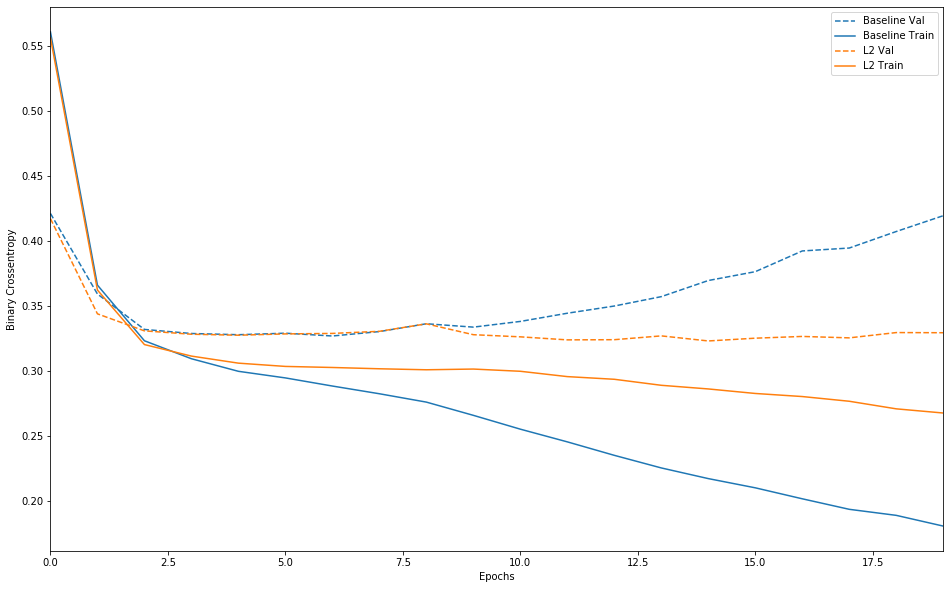

In [41]:
# Plot impact.
plot_history([('baseline', baseline_history),\
             ('l2', l2_model_history)])

In [42]:
# 2. Dropout
# One of the most effective and most commonly used regularization
# techniques for neural networks, dev. by Hinton and his students
# at the University of Toronto.
# Dropout, applied to a layer, consists of randomly "dropping 
# out" (i.e. set to 0) a number of output features of the layer
# during training.
# Dropout rate: fraction of the features that are being zeroed-
# out. Usually set between 0.2 and 0.5.
# At test time, no units are dropped out, and instead, the 
# layer's output values are scaled down by a factor equal to the
# dropout rate, so as to balance for the fact that more units are
# active than at training time.

In [43]:
# Build Dropout model.
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu,\
        input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [44]:
# Compile model.
dpt_model.compile(optimizer='adam',\
                 loss='binary_crossentropy',\
                 metrics=['accuracy', 'binary_crossentropy'])

In [45]:
# Train model with same data.
dpt_model_history = dpt_model.fit(train_data, train_labels,\
                        epochs=20, batch_size=512,\
                        validation_data=(test_data,test_labels),\
                        verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 6s - loss: 0.6789 - acc: 0.5595 - binary_crossentropy: 0.6789 - val_loss: 0.6216 - val_acc: 0.7346 - val_binary_crossentropy: 0.6216
Epoch 2/20
25000/25000 - 2s - loss: 0.5957 - acc: 0.6621 - binary_crossentropy: 0.5957 - val_loss: 0.4957 - val_acc: 0.8142 - val_binary_crossentropy: 0.4957
Epoch 3/20
25000/25000 - 2s - loss: 0.5119 - acc: 0.7452 - binary_crossentropy: 0.5119 - val_loss: 0.4080 - val_acc: 0.8412 - val_binary_crossentropy: 0.4080
Epoch 4/20
25000/25000 - 2s - loss: 0.4594 - acc: 0.7899 - binary_crossentropy: 0.4594 - val_loss: 0.3656 - val_acc: 0.8500 - val_binary_crossentropy: 0.3656
Epoch 5/20
25000/25000 - 2s - loss: 0.4209 - acc: 0.8184 - binary_crossentropy: 0.4209 - val_loss: 0.3453 - val_acc: 0.8556 - val_binary_crossentropy: 0.3453
Epoch 6/20
25000/25000 - 2s - loss: 0.3962 - acc: 0.8362 - binary_crossentropy: 0.3962 - val_loss: 0.3345 - val_acc: 0.8572 - val_binary_crossentropy: 0.3345
Ep

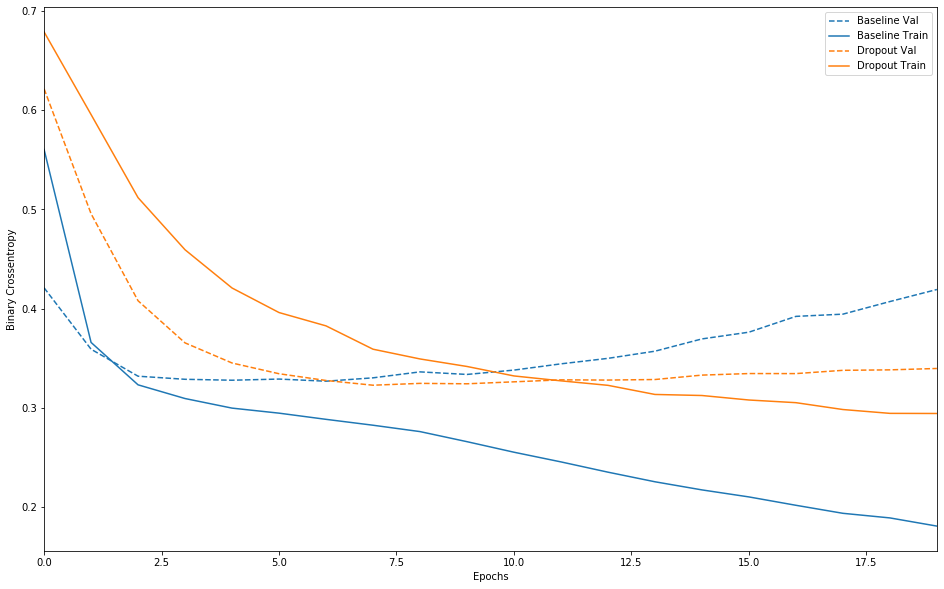

In [46]:
# Plot impact of dropout.
plot_history([('baseline', baseline_history),\
             ('dropout', dpt_model_history)])